In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_dataset_path = 'C:/Users/katsa/OneDrive/Jupyter_files/shallow_models_online/cic_train_sample_binary.csv'
CICDataset_train = pd.read_csv(train_dataset_path)
X_train, y_train = CICDataset_train.iloc[:, :-1], CICDataset_train['Label']

In [5]:
# Create a pipeline with SimpleImputer, StandardScaler, and DecisionTreeClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])

# Define the hyperparameter grid to search over
param_grid = {
    'clf__max_depth': [3, 5, 7, 9, 12, 16, 20, 25]
}

# Create a GridSearchCV object with the pipeline and hyperparameter grid
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object on your training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'clf__max_depth': 25}
Best score: 1.00


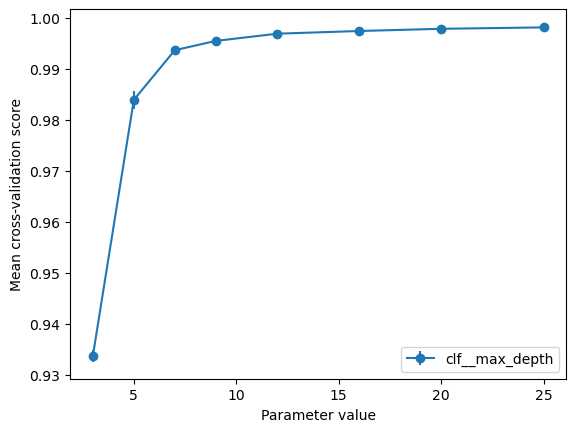

In [6]:
# assume you have already created and fitted the grid search object 'grid_search'

# convert cv_results_ to a pandas DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# extract the relevant columns
param_cols = [col for col in results_df.columns if col.startswith('param_')]
mean_test_score = 'mean_test_score'
std_test_score = 'std_test_score'

# plot the mean test score and standard deviation for each parameter setting
fig, ax = plt.subplots()
for col in param_cols:
    df = results_df[[col, mean_test_score, std_test_score]].dropna()
    param_name = col.replace('param_', '')
    param_values = df[col]
    ax.errorbar(param_values, df[mean_test_score], yerr=df[std_test_score], label=param_name, fmt='-o')
ax.set_xlabel('Parameter value')
ax.set_ylabel('Mean cross-validation score')
ax.legend()
plt.show()

In [10]:
# Create a pipeline with SimpleImputer, StandardScaler, and DecisionTreeClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])

# Define the hyperparameter grid to search over
param_grid = {
    'clf__max_depth': [9],
    'clf__criterion': ['gini', 'entropy'],
    'clf__splitter': ['best', 'random'],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': [None, 'sqrt', 'log2'],
    'clf__class_weight': [None, 'balanced']
}

# Create a GridSearchCV object with the pipeline and hyperparameter grid
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object on your training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'clf__class_weight': None, 'clf__criterion': 'entropy', 'clf__max_depth': 9, 'clf__max_features': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__splitter': 'best'}
Best score: 1.00
